# Deep learning project - Exploratory data analysis


Amirmohammad Shahbandegan

Siavash Hosseini

Mohammad Ghadiri

## Loading the data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#Amir
base_path = '/content/drive/MyDrive/Deep learning/'

def base_dir(file_name):
  return os.path.join(base_path, file_name)

In [ ]:
#Amir
df = pd.read_csv(base_dir('Data/measures_v2.csv'))

## Data exploration

In [ ]:
#Mohammad
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


### Features
There are 13 columns in the dataset.

8 features can be used for training:
- u_q: 
- u_d: 
- i_q:
- i_d:
- coolant: 
- ambient:
- motor speed: 
- torque: 

4 columns to be predicted:
- stator_winding: 
- stator_yoke: 
- stator_teeth:
- permanent_magnet:

The *profile_id* column indicates the id of the experimnet.

### Number of profiles
There are 69 different mesured profiles

In [ ]:
#Mohammad
a = df.profile_id.unique()
np.sort(a)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 23, 24, 26, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80,
       81])

### Profile lengths
The length of the profiles vary from 0.3 to 6.1 hours

In [ ]:
#Mohammad
# the data has been collected by the frequency of 2 hz. In 1 hour we have 7200 samples.

g_df = df.groupby('profile_id').size().reset_index(name='hours')
g_df['hours'] /= 7200
g_df.sort_values('hours')

,profile_id,hours
35,47,0.302222
34,46,0.302778
40,52,0.517500
52,64,0.868056
39,51,0.869583
...,...,...
54,66,5.066111
16,18,5.240556
53,65,5.568611
4,6,5.609444


In [ ]:
print('Total number of hours:', g_df['hours'].sum())

Total number of hours: 184.8355555555556


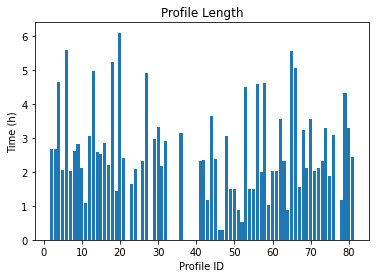

In [ ]:
#Siavash
g_df = g_df.sort_values('hours')
#sns.barplot(x='profile_id', y='hours', data=g_df)
plt.bar(g_df['profile_id'], g_df['hours'])
plt.title('Profile Length')
plt.xlabel('Profile ID')
plt.ylabel('Time (h)')
plt.savefig(base_dir('Figures/profile_length.pdf'))

In [ ]:
#Amir
d_df = g_df.copy()
d_df['hours'] = d_df['hours'].apply(round)

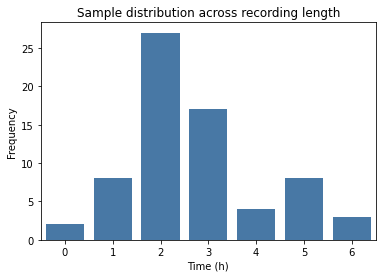

In [ ]:
#Amir
d_plot = sns.countplot(x='hours', data=d_df, color='#3978B4')
d_plot.set_title('Sample distribution across recording length')
d_plot.set_ylabel('Frequency')
d_plot.set_xlabel('Time (h)')
d_plot.get_figure().savefig(base_dir('Figures/sample_distribution.pdf'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


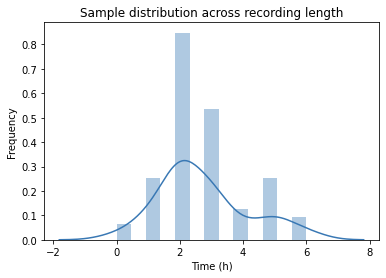

In [ ]:
#Siavash
d_plot = sns.distplot(d_df.hours, color='#3978B4')
d_plot.set_title('Sample distribution across recording length')
d_plot.set_ylabel('Frequency')
d_plot.set_xlabel('Time (h)')
d_plot.get_figure().savefig(base_dir('Figures/sample_distribution_density.pdf'))

### Features correlation

In [ ]:
#Amir
c_df = df.copy()
c_df.drop(columns=['profile_id'], inplace=True)
t_correlations = c_df.corr().to_numpy()

In [ ]:
#Amir
feature_list = df.columns[:-1]
n_features = len(feature_list)
n_profiles = len(df.profile_id.unique())

corrs = np.zeros((n_profiles, n_features, n_features))
for i, p_id in enumerate(df.profile_id.unique()):
  p_df = df[df['profile_id'] == p_id]
  pc_df = p_df.drop(columns=['profile_id'])
  corrs[i] = pc_df.corr().to_numpy()

correlations = np.mean(corrs, axis=0)

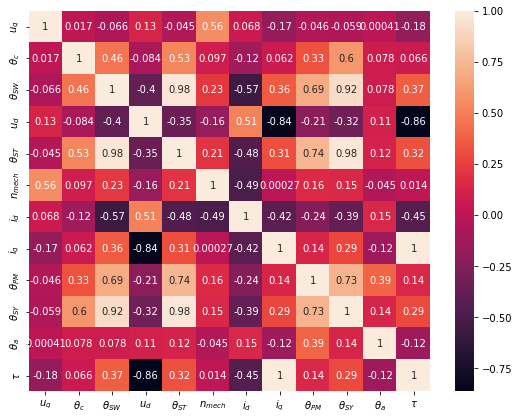

In [ ]:
#Siavash
plt.figure(figsize=(9,7))
heatmap = sns.heatmap(correlations,
                      annot=True,
                      xticklabels=['$u_{q}$','$\\theta_{c}$','$\\theta_{SW}$','$u_{d}$','$\\theta_{ST}$','$n_{mech}$','$i_{d}$','$i_{q}$','$\\theta_{PM}$','$\\theta_{SY}$','$\\theta_{a}$','$\\tau$'],
                      yticklabels=['$u_{q}$','$\\theta_{c}$','$\\theta_{SW}$','$u_{d}$','$\\theta_{ST}$','$n_{mech}$','$i_{d}$','$i_{q}$','$\\theta_{PM}$','$\\theta_{SY}$','$\\theta_{a}$','$\\tau$'])
heatmap.get_figure().savefig(base_dir('Figures/heatmap.pdf'))

### Dataset description

In [ ]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


### Features Distribution

In [ ]:

#Mohammad
feature_list = ['u_q', 'u_d', 'i_q', 'i_d', 'coolant', 'ambient', 'motor_speed',
                'torque', 'stator_winding', 'stator_tooth', 'stator_yoke', 'pm']
y_labels = ['Voltage in V', 'Voltage in V', 'Current in A', 'Current in A',
            'Temperature in °C', 'Temperature in °C', 'Motor speed in RPM',
            'Torque in N.M', 'Temperature in °C', 'Temperature in °C',
            'Temperature in °C', 'Temperature in °C']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

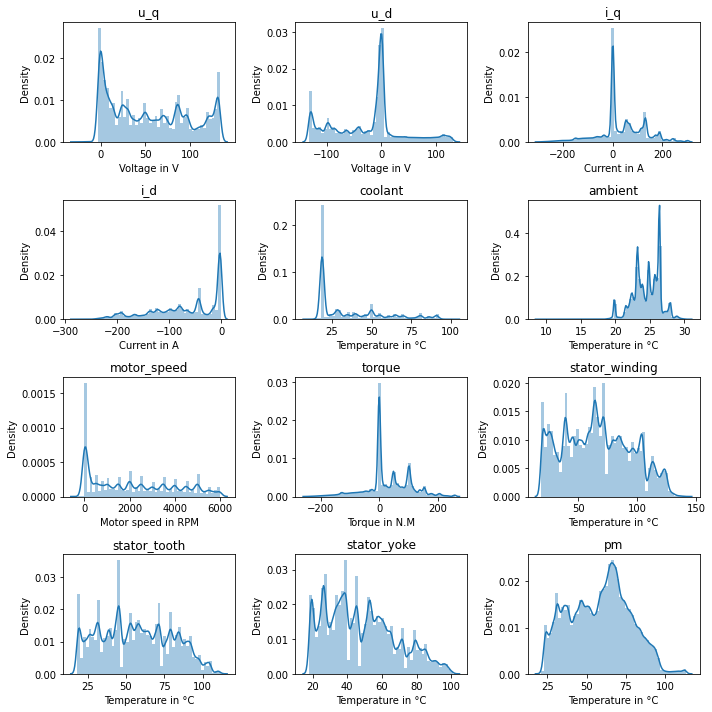

In [ ]:
#Mohammad
fig, ax = plt.subplots(4, 3)

ax = ax.flatten()

for i, (feature, label) in enumerate(zip(feature_list, y_labels)):
  sns.distplot(df[feature], ax=ax[i])
  ax[i].set_title(feature)
  ax[i].set_xlabel(label)

fig.set_size_inches(10, 10)
fig.tight_layout()

### Features Plot

In [ ]:
#Amir

def plot_profiles(target_features, ylabel):
  profile_ids = df.profile_id.unique()
  profile_ids.sort()
  n_profiles = len(profile_ids)

  fig, ax = plt.subplots(int(np.ceil(n_profiles/4)), 4)
  ax = ax.flatten()

  for i, p_id in enumerate(profile_ids):
    p_df = df[df['profile_id'] == p_id]
    ax[i].set_title(f'Profile {p_id}')
    for feat in target_features:
      ax[i].plot(p_df[feat], label=feat)

    if i%4 == 0:
      ax[i].set_ylabel(ylabel)
    ax[i].xaxis.set_ticklabels([])

  fig.set_size_inches(12, 30)
  fig.tight_layout()

  lines, labels = fig.axes[0].get_legend_handles_labels()
  print(lines, labels)
  fig.legend(lines, labels, loc = 'upper center', ncol=4)
  plt.show()


[<matplotlib.lines.Line2D object at 0x7f4719719e10>, <matplotlib.lines.Line2D object at 0x7f4719725490>, <matplotlib.lines.Line2D object at 0x7f47197259d0>, <matplotlib.lines.Line2D object at 0x7f4719725f10>] ['stator_yoke', 'stator_winding', 'stator_tooth', 'pm']


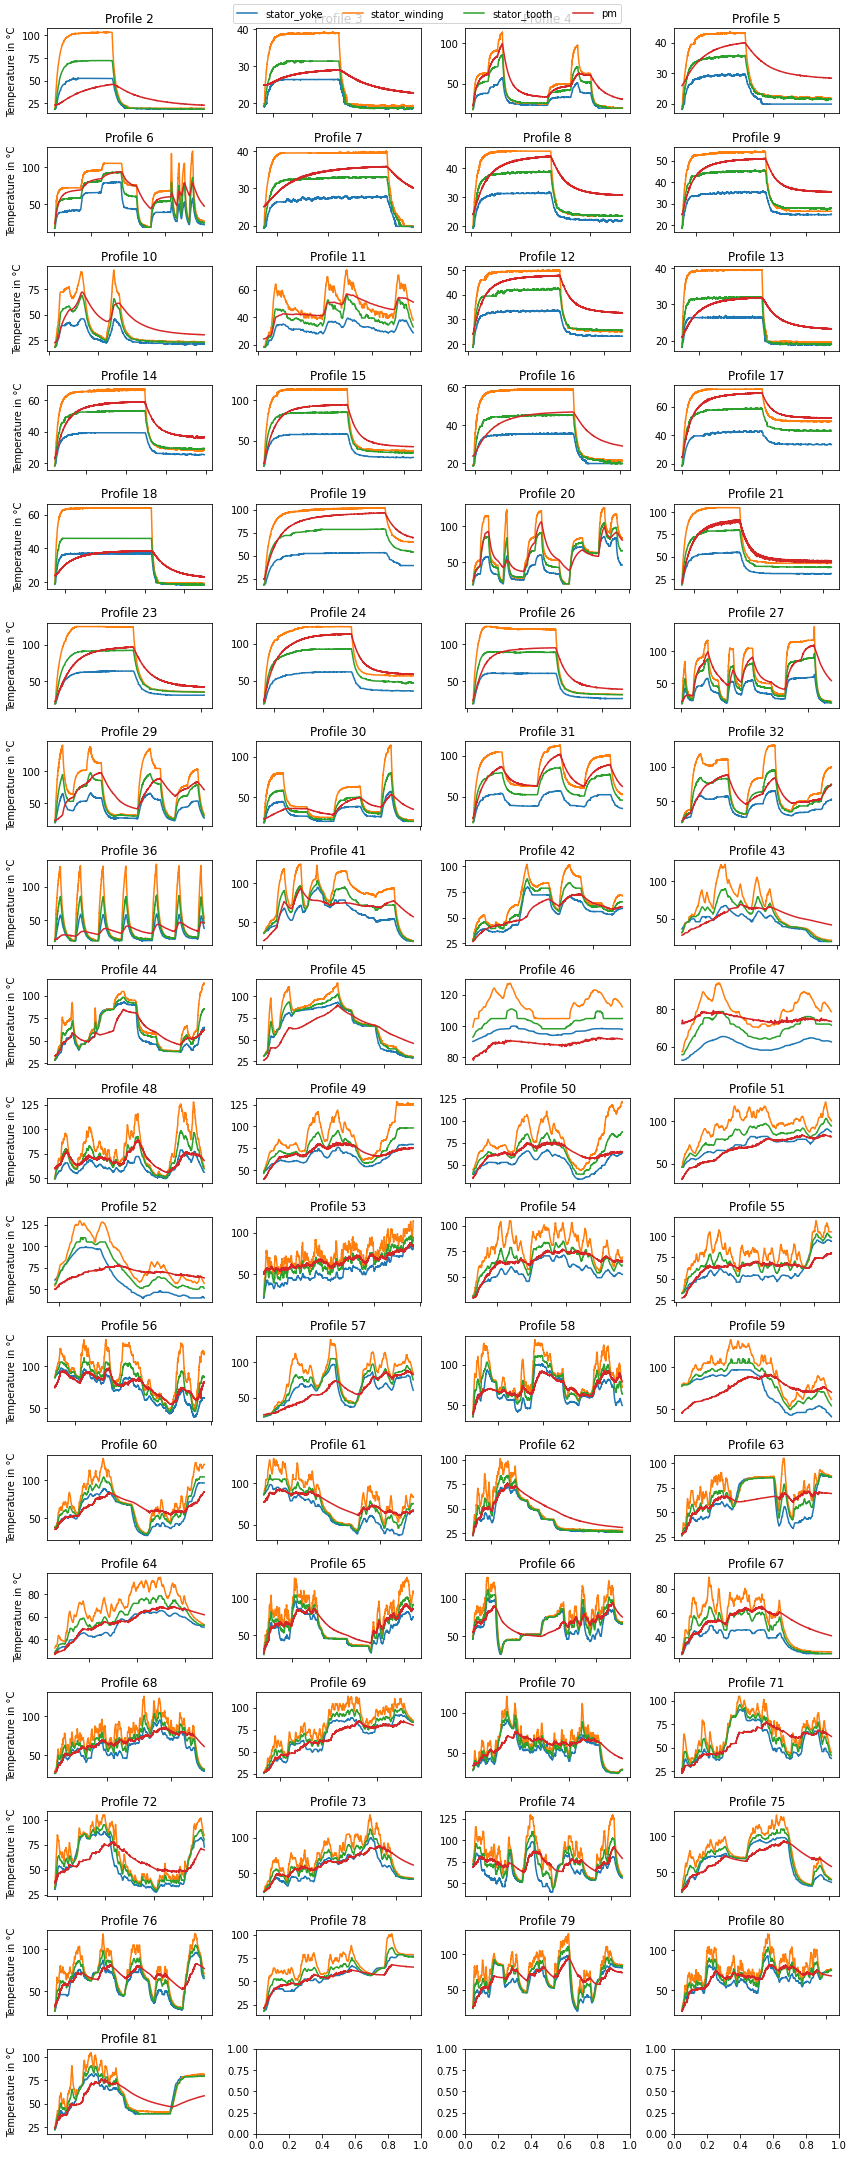

In [ ]:
plot_profiles(['stator_yoke', 'stator_winding', 'stator_tooth', 'pm'], 'Temperature in °C')

[<matplotlib.lines.Line2D object at 0x7f4719851b50>, <matplotlib.lines.Line2D object at 0x7f4719851810>] ['i_q', 'i_d']


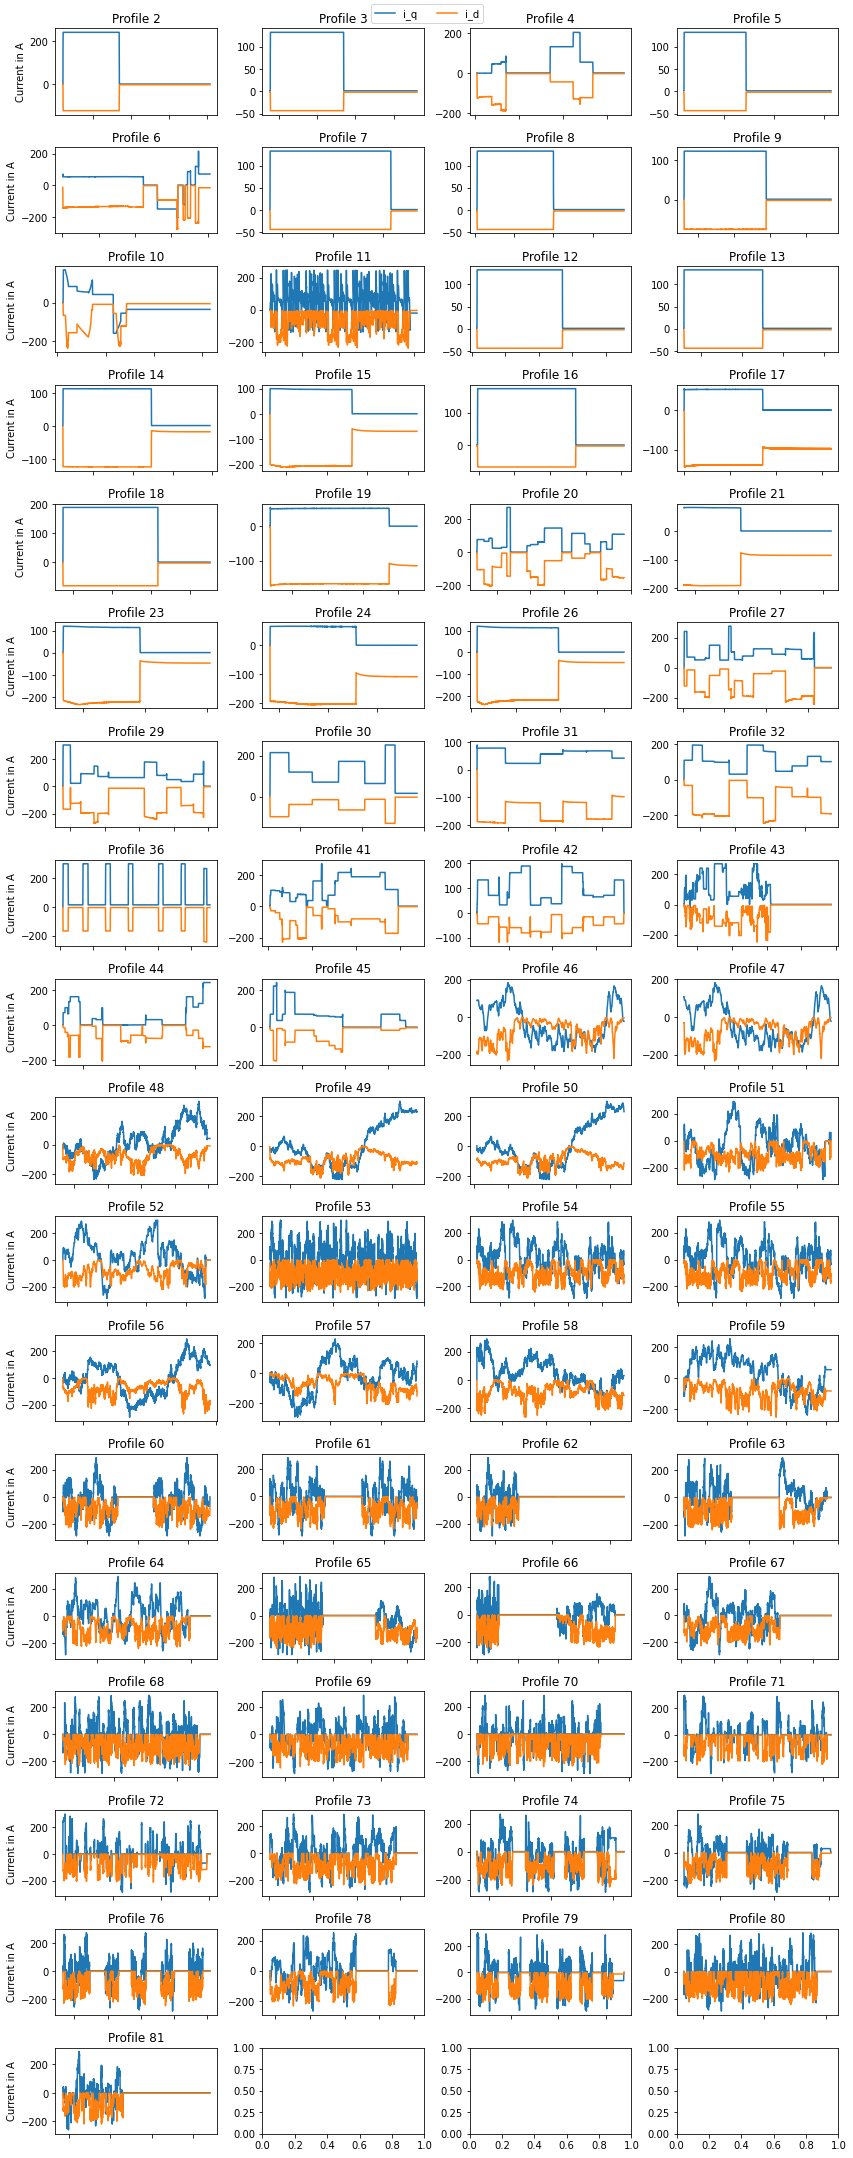

In [ ]:
plot_profiles(['i_q', 'i_d'], 'Current in A')

[<matplotlib.lines.Line2D object at 0x7f471993b7d0>, <matplotlib.lines.Line2D object at 0x7f471993be90>] ['u_q', 'u_d']


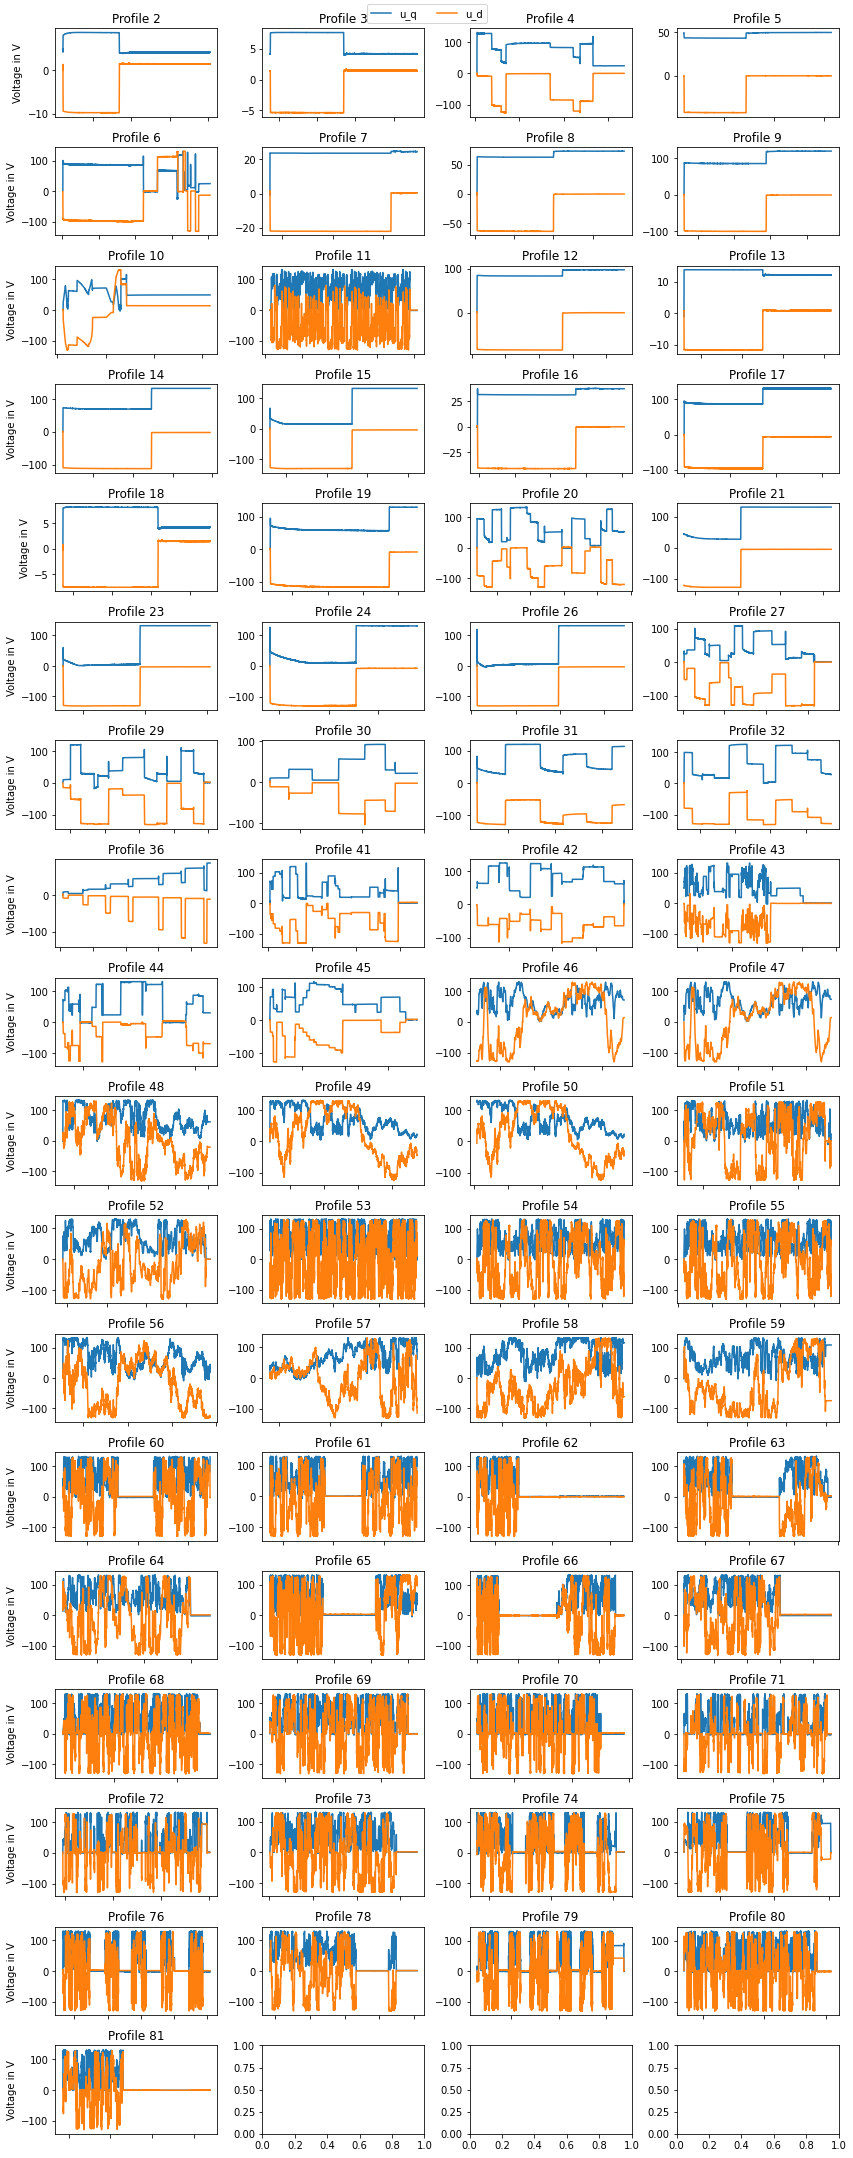

In [ ]:
plot_profiles(['u_q', 'u_d'], 'Voltage in V')

[<matplotlib.lines.Line2D object at 0x7f4719cf69d0>] ['motor_speed']


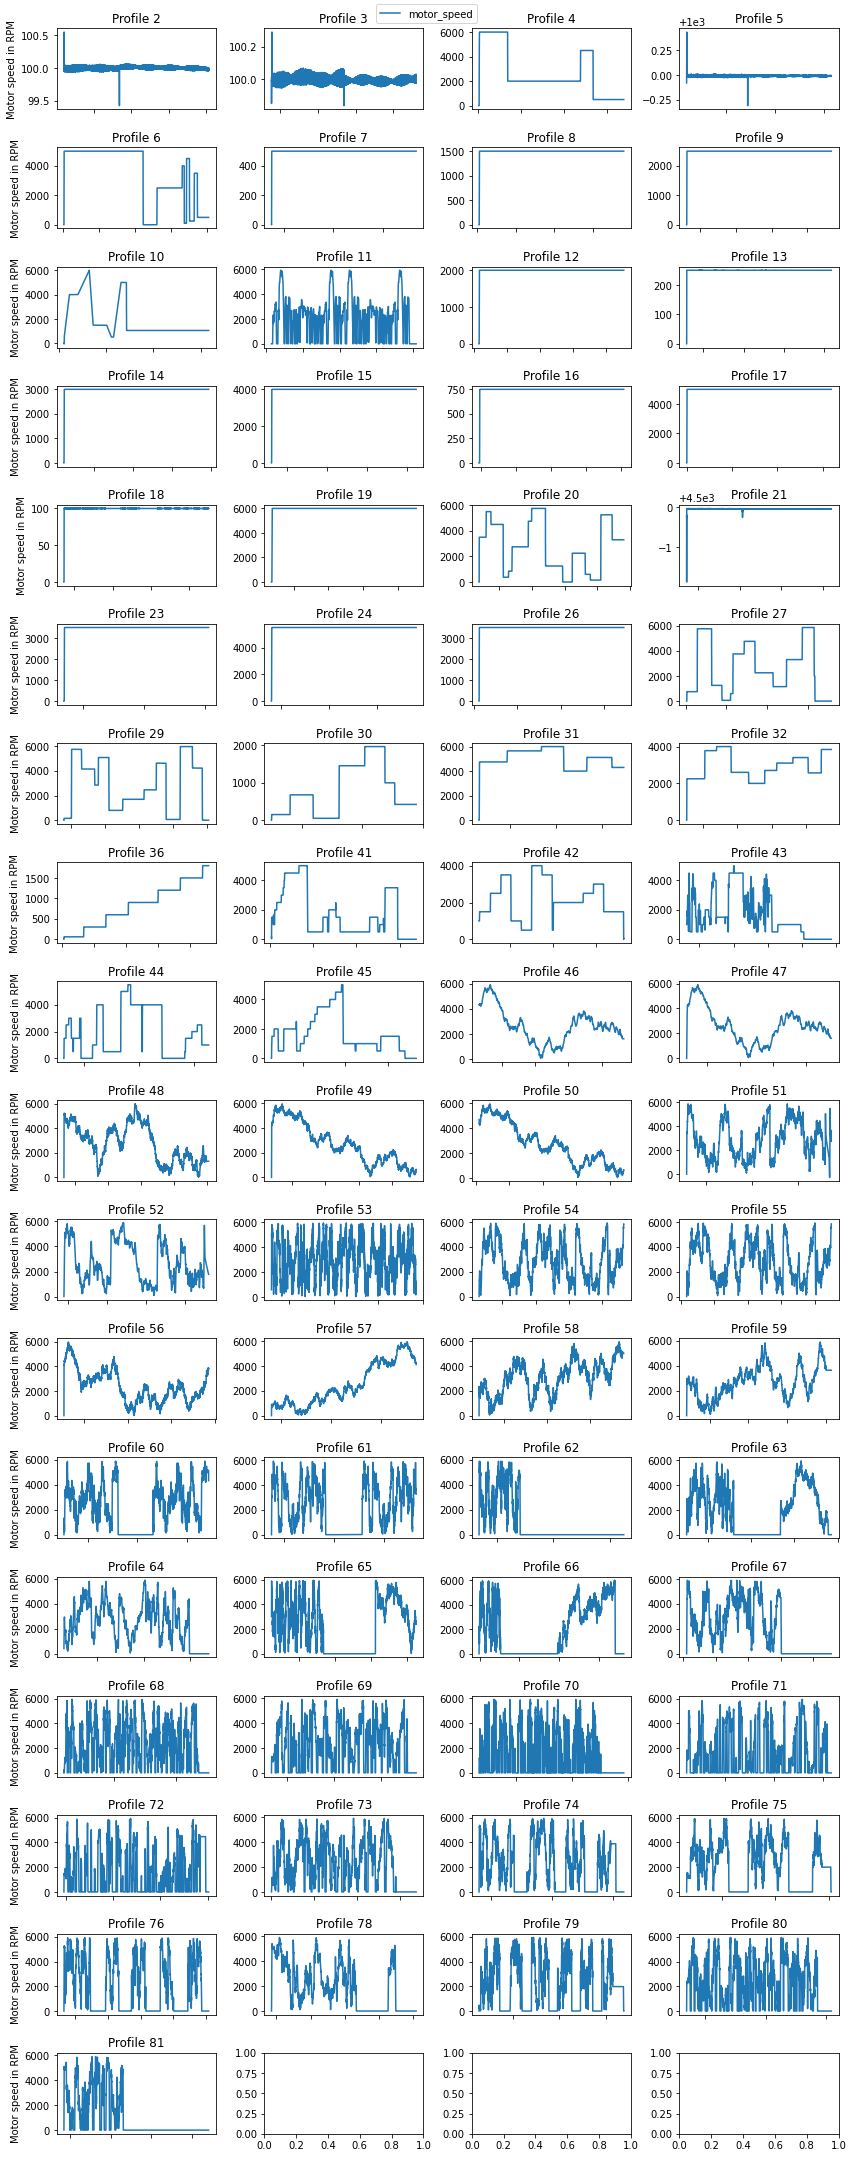

In [ ]:
plot_profiles(['motor_speed'], 'Motor speed in RPM')

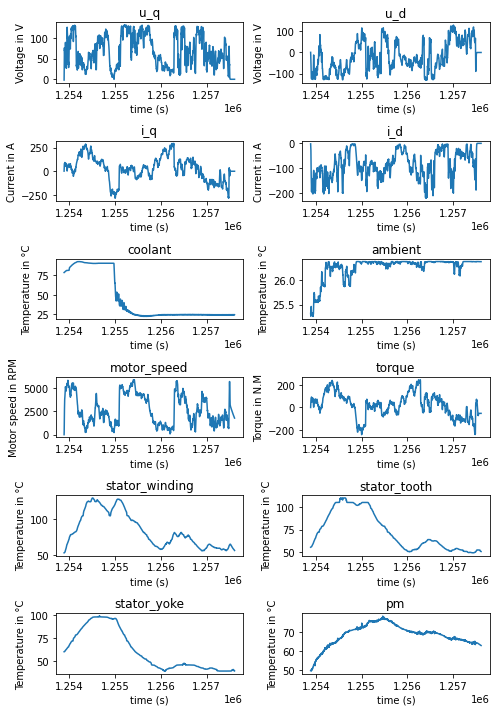

In [ ]:
#Siavash

profile = df[df['profile_id'] == 52]

fig, ax = plt.subplots(6, 2)

ax = ax.flatten()

for i, (feature, y_label) in enumerate(zip(feature_list, y_labels)):
  ax[i].set_title(feature)
  ax[i].plot(profile[feature])
  ax[i].set_ylabel(y_label)
  ax[i].set_xlabel('time (s)')

fig.set_size_inches(7, 10)
fig.tight_layout()

plt.show()
fig.savefig(base_dir('Figures/profile_52_features.pdf'))

### Motor Operation Point
Plotting motor speed vs torque gives the operating point of the motor.

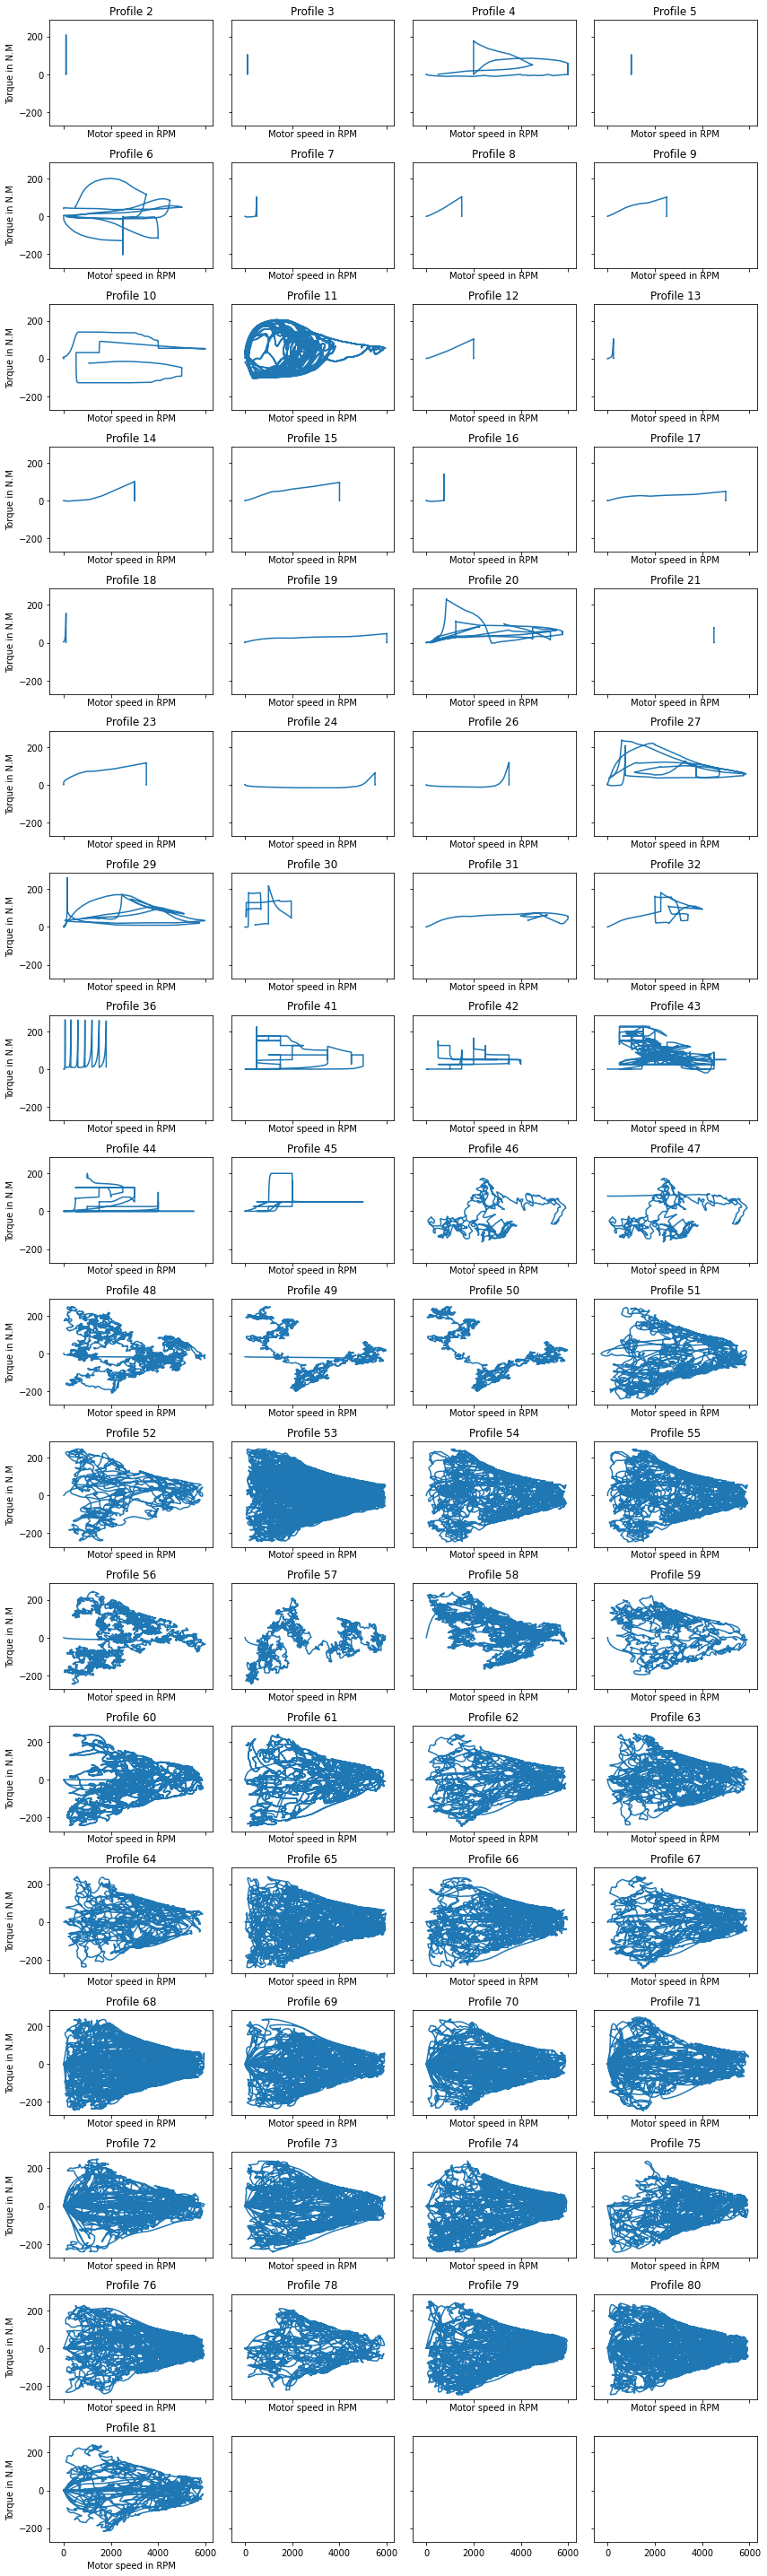

In [ ]:
#Amir

def plot_op():
  profile_ids = df.profile_id.unique()
  profile_ids.sort()
  n_profiles = len(profile_ids)

  fig, ax = plt.subplots(int(np.ceil(n_profiles/4)), 4, sharex=True, sharey=True)
  ax = ax.flatten()

  for i, p_id in enumerate(profile_ids):
    p_df = df[df['profile_id'] == p_id]
    ax[i].set_title(f'Profile {p_id}')
    ax[i].plot(p_df['motor_speed'], p_df['torque'])
    ax[i].set_xlabel('Motor speed in RPM')
    if i%4 == 0:
      ax[i].set_ylabel('Torque in N.M')

  fig.set_size_inches(12, 40)
  fig.tight_layout()
  plt.show()

plot_op()